In [11]:
import os
data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    !unzip cca_ex1_data.zip -d $data_dir

In [12]:
!cat data/cpu_inter_1.txt

#type       avg     std     min      p5     p10     p50     p67     p75     p80     p85     p90     p95     p99    p999   p9999     QPS   target
read     1355.8  1662.9   160.7   248.0   279.3   521.3  1950.5  2067.3  2173.5  2675.0  3603.8  3920.6  4151.9 25465.6 36206.6  30003.6    30000
read     1177.0  1445.6   160.7   247.9   279.8   504.1  1782.8  1987.9  2078.2  2187.6  2828.7  3841.9  4289.5 17922.7 31945.2  34900.8    35000
read     1058.8  1455.8   160.7   251.1   284.1   487.8   652.6  1862.8  1981.7  2096.6  2285.9  3838.5  5177.8 18855.0 32119.2  40104.6    40000
read      978.0  1444.7   148.8   253.5   286.3   477.2   603.6   756.1  1903.4  2033.1  2186.1  3758.9  5109.9 19918.4 32176.1  44957.8    45000
read      912.3  1367.8   160.7   259.1   294.3   492.0   607.9   713.0   854.5  1964.4  2142.7  3608.8  4872.5 19528.7 35696.8  49878.0    50000
read     1587.5  3210.5   173.5   429.2   459.9   610.2   927.6  1026.3  1094.4  3872.3  4666.8  5180.3  8668.7 36701.2 49415

In [13]:
import pandas as pd
from os.path import join
def sample_to_df(filename):
    df = pd.read_csv(join(data_dir, filename), sep='\s+', header=0, skipfooter=2, engine='python')
    df = df.drop(columns=['#type'])
    # convert all columns from us to ms and QPS to kQPS
    df = df.apply(lambda x: x/1e3)
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'sample_id'}, inplace=True)
    return df

def samples_to_df(interferences, n_samples=3):
    merged_mean_df = pd.DataFrame()
    merged_std_df = pd.DataFrame()
    for interference in interferences:
        sample_dfs = pd.DataFrame()
        for i in range(1, n_samples+1):
            filename = f'{interference}_inter_{i}.txt'
            sample_df = sample_to_df(filename)
            sample_dfs = pd.concat([sample_dfs, sample_df])
        mean_df = sample_dfs.groupby('sample_id').mean(numeric_only=True)
        std_df = sample_dfs.groupby('sample_id').std(numeric_only=True)
        mean_df['interference'] = interference
        std_df['interference'] = interference
        merged_mean_df = pd.concat([merged_mean_df, mean_df])
        merged_std_df = pd.concat([merged_std_df, std_df])
    return merged_mean_df, merged_std_df


In [14]:
interferences=['cpu', 'l1d', 'l1i', 'l2', 'llc', 'membw', 'none']
samples_mean_df, samples_std_df = samples_to_df(interferences)
samples_mean_df

,avg,std,min,p5,p10,p50,p67,p75,p80,p85,p90,p95,p99,p999,p9999,QPS,target,interference
sample_id,,,,,,,,,,,,,,,,,,
0,1.353267,1.643033,0.160700,0.249900,0.282167,0.535667,1.955233,2.074433,2.172500,2.542133,3.539800,3.914767,4.110933,23.775633,33.482300,29.984933,30.0,cpu
1,1.194167,1.498333,0.160700,0.250933,0.283500,0.513733,1.487667,1.987933,2.080700,2.193433,2.939800,3.880867,4.763367,19.709433,32.038400,34.943933,35.0,cpu
2,1.071467,1.466000,0.160700,0.251033,0.283367,0.481000,0.645400,1.888467,1.996667,2.114733,2.332400,3.851367,5.144567,19.045967,33.570033,40.022467,40.0,cpu
3,0.967833,1.430433,0.156733,0.257300,0.291567,0.495433,0.619733,0.754833,1.574867,2.028067,2.179100,3.720000,5.056667,19.710067,34.214767,44.943200,45.0,cpu
4,1.051100,1.791433,0.160700,0.285467,0.326600,0.529400,0.676867,0.792633,0.914700,1.985533,2.816300,4.051600,5.844600,23.598367,37.586533,49.759733,50.0,cpu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,0.395533,0.213433,0.148800,0.207467,0.226733,0.373200,0.439567,0.476933,0.504533,0.538633,0.584167,0.657433,0.798467,1.161700,8.654267,89.998733,90.0,no
13,0.483000,0.262700,0.152767,0.268433,0.293000,0.433933,0.542867,0.599000,0.633600,0.671633,0.719233,0.788933,0.921967,1.713333,10.682100,94.592800,95.0,no
14,0.677600,0.341967,0.160700,0.400300,0.434033,0.577967,0.774000,0.874033,0.926800,0.977167,1.027733,1.087433,1.184967,2.297700,14.036200,94.734400,100.0,no


In [15]:
samples_std_df

,avg,std,min,p5,p10,p50,p67,p75,p80,p85,p90,p95,p99,p999,p9999,QPS,target,interference
sample_id,,,,,,,,,,,,,,,,,,
0,0.003402,0.023838,0.00000,0.001664,0.002554,0.012486,0.004854,0.007253,0.001908,0.115466,0.056487,0.005659,0.040222,2.037230,2.360497,0.041480,0.0,cpu
1,0.022697,0.048765,0.00000,0.002627,0.003236,0.008386,0.494908,0.011150,0.015601,0.019999,0.182477,0.037719,0.410562,1.553295,0.139599,0.115129,0.0,cpu
2,0.013288,0.012682,0.00000,0.002101,0.002194,0.009071,0.009601,0.022337,0.012962,0.015707,0.041168,0.038546,0.035657,0.188023,2.564967,0.073041,0.0,cpu
3,0.010200,0.034116,0.00687,0.003617,0.005201,0.016874,0.015410,0.011353,0.298869,0.006824,0.006384,0.048113,0.048283,1.209928,3.105993,0.013355,0.0,cpu
4,0.224747,0.722095,0.00000,0.033381,0.042465,0.045742,0.103436,0.124997,0.109771,0.051651,1.154261,0.663941,1.531994,8.683235,4.984806,0.326292,0.0,cpu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,0.005590,0.039535,0.00000,0.002003,0.002468,0.004900,0.006296,0.007101,0.006804,0.006790,0.005581,0.005181,0.006924,0.067872,3.323514,0.073343,0.0,no
13,0.150657,0.064021,0.00687,0.104416,0.111597,0.105904,0.186802,0.219813,0.230865,0.235713,0.234258,0.223767,0.198148,0.836308,2.041900,0.679784,0.0,no
14,0.004976,0.005108,0.00000,0.007062,0.005294,0.002318,0.012644,0.007694,0.006102,0.006117,0.008210,0.004817,0.001890,0.546587,1.215967,0.635330,0.0,no


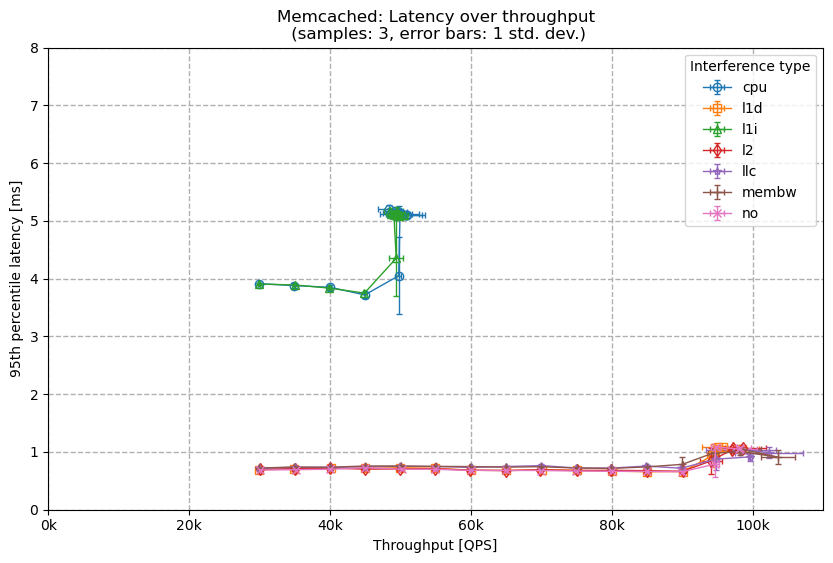

In [34]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from cycler import cycler


marker_cycler = cycler(
    color=[
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
    ],
    marker=['o', 's', '^', 'd', '*', '+', 'x', 'v', 'p', 'h'])


fig, ax = plt.subplots(figsize=(10, 6))
ax.set_prop_cycle(marker_cycler)
for interference in interferences:
    means_df = samples_mean_df[samples_mean_df['interference'] == interference]
    errors_df = samples_std_df[samples_std_df['interference'] == interference]
    ax.errorbar(means_df['QPS'], means_df['p95'], yerr=errors_df['p95'], label=interference, xerr=errors_df['QPS'], capsize=2, capthick=1, elinewidth=1, markersize=6, linewidth=1, markerfacecolor='none')
ax.set_xlabel('Throughput [QPS]')
ax.set_ylabel('95th percentile latency [ms]')
ax.set_ylim(0, 8)
ax.set_xlim(0, 110)
ax.xaxis.set_major_locator(ticker.FixedLocator(ax.get_xticks()))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([f'{int(x)}k' for x in ax.get_xticks()]))
ax.yaxis.set_major_locator(ticker.FixedLocator(ax.get_yticks()))
ax.yaxis.set_major_formatter(ticker.FixedFormatter([f'{int(x)}' for x in ax.get_yticks()]))
ax.set_title('Memcached: Latency over throughput\n (samples: 3, error bars: 1 std. dev.)')
ax.grid(linestyle='--', linewidth=1)
ax.legend(title='Interference type')
plt.show()
fig.savefig('figures/plot-1a.pdf', bbox_inches='tight')